# Outlier

For data that is normally distributed, around 68.2% of the data will lie within one standard deviation from the mean. Close to 95.4% and 99.7% of the data lie within two and three standard deviations from the mean, respectively.

Let’s denote the standard deviation of the distribution by σ, and the mean by μ.

One approach to outlier detection is to set the lower limit to three standard deviations below the mean (μ - 3*σ), and the upper limit to three standard deviations above the mean (μ + 3*σ). Any data point that falls outside this range is detected as an outlier.

As 99.7% of the data typically lies within three standard deviations, the number of outliers will be close to 0.3% of the size of the dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def generate_scores(mean=60,std_dev=12,num_samples=200): #default mean=60 std=12 samples=200
	np.random.seed(27)
	scores = np.random.normal(loc=mean,scale=std_dev,size=num_samples)
	scores = np.round(scores, decimals=0)
	return scores

In [3]:
scores_data = generate_scores()
scores_data

array([75., 56., 67., 65., 63., 59., 58., 63., 70., 75., 67., 65., 53.,
       48., 75., 54., 57., 57., 57., 54., 53., 66., 62., 55., 65., 45.,
       65., 29., 69., 49., 58., 81., 91., 58., 61., 65., 50., 78., 65.,
       63., 72., 46., 73., 61., 60., 70., 42., 67., 82., 72., 74., 69.,
       58., 64., 70., 65., 44., 90., 60., 58., 52., 52., 63., 59., 65.,
       56., 44., 58., 58., 45., 61., 42., 51., 67., 61., 75., 72., 71.,
       58., 67., 60., 69., 62., 64., 52., 58., 75., 35., 43., 63., 62.,
       67., 72., 72., 58., 64., 64., 53., 47., 45., 45., 67., 73., 78.,
       69., 66., 69., 59., 57., 63., 66., 34., 45., 63., 65., 61., 47.,
       68., 53., 70., 73., 70., 38., 78., 62., 83., 60., 67., 61., 57.,
       64., 63., 48., 61., 88., 84., 62., 67., 39., 56., 72., 66., 62.,
       67., 77., 60., 46., 59., 65., 59., 54., 79., 38., 46., 50., 72.,
       61., 47., 65., 29., 71., 59., 65., 46., 56., 67., 62., 64., 57.,
       76., 64., 64., 73., 62., 61., 38., 20., 55., 63., 55., 39

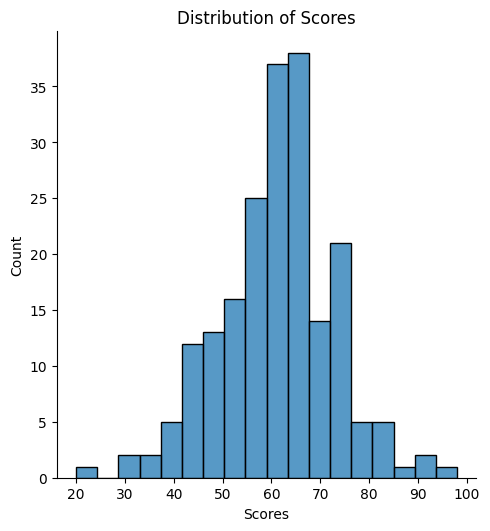

In [4]:
sns.displot(data=scores_data).set(title="Distribution of Scores", xlabel="Scores");

In [5]:
df_scores = pd.DataFrame(scores_data,columns=['score'])
df_scores

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
195,76.0
196,67.0
197,74.0
198,98.0


In [6]:
df_scores.mean()

score    61.005
dtype: float64

In [7]:
#lower_limit = float(df_scores.mean() - 3*df_scores.std())
#upper_limit = float(df_scores.mean() + 3*df_scores.std()) # deprecato

lower_limit = float((df_scores.mean() - 3 * df_scores.std()).iloc[0])
upper_limit = float((df_scores.mean() + 3 * df_scores.std()).iloc[0])

print(lower_limit,upper_limit)


25.441697037705573 96.56830296229444


In [8]:
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
score,200.0,61.005,11.854434,20.0,54.0,62.0,67.0,98.0


In [9]:
df_scores_filtered = df_scores[(df_scores['score']> lower_limit)&(df_scores['score'] < upper_limit)]
df_scores_filtered

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
194,42.0
195,76.0
196,67.0
197,74.0


### How to Detect Outliers Using the Z-Score
Now let's explore the concept of the z-score. For a normal distribution with mean μ and standard deviation σ, the z-score for a value x in the dataset is given by:

z = (x - μ)/σ

- When x = μ, the value of z-score is 0.
- When x = μ ± 1, μ ± 2, or μ ± 3, the z-score is ± 1, ± 2, or ± 3, respectively.

Notice how this technique is equivalent to the scores based on standard deviation we had earlier. Under this transformation, all data points that lie below the lower limit, μ - 3*σ, now map to points that are less than -3 on the z-score scale.

Similarly, all points that lie above the upper limit, μ + 3*σ map to a value above 3 on the z-score scale. So [lower_limit, upper_limit] becomes [-3, 3].

In [10]:
df_scores['z_score']=(df_scores['score'] - df_scores['score'].mean())/df_scores['score'].std()
df_scores

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291
...,...,...
195,76.0,1.264928
196,67.0,0.505718
197,74.0,1.096214
198,98.0,3.120773


In [11]:
df_scores_filtered= df_scores[(df_scores['z_score']>-3) & (df_scores['z_score']<3)]
df_scores_filtered

,score,z_score
0,75.0,1.180571
1,56.0,-0.422205
2,67.0,0.505718
3,65.0,0.337005
4,63.0,0.168291
...,...,...
194,42.0,-1.603198
195,76.0,1.264928
196,67.0,0.505718
197,74.0,1.096214


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/iqr.jpg" width="600">


### How to Detect Outliers Using the Interquartile Range (IQR)
In statistics, interquartile range or IQR is a quantity that measures the difference between the first and the third quartiles in a given dataset.

The first quartile is also called the one-fourth quartile, or the 25% quartile.
If q25 is the first quartile, it means 25% of the points in the dataset have values less than q25.
The third quartile is also called the three-fourth, or the 75% quartile.
If q75 is the three-fourth quartile, 75% of the points have values less than q75.
Using the above notations, IQR = q75 - q25.

### Code for Outlier Detection Using Interquartile Range (IQR)
You can use the box plot, or the box and whisker plot, to explore the dataset and visualize the presence of outliers. The points that lie beyond the whiskers are detected as outliers.

[Text(0.5, 1.0, 'Box Plot of Scores')]

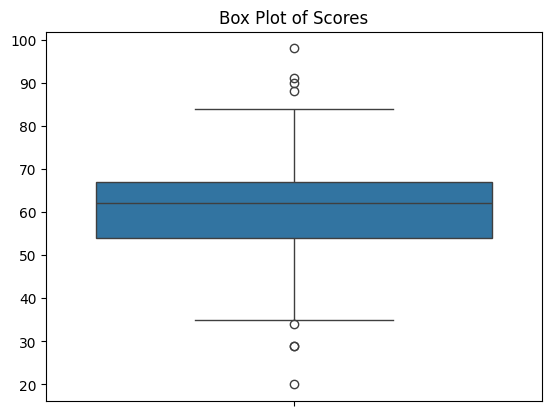

In [12]:
sns.boxplot(data=scores_data).set(title="Box Plot of Scores")

In [13]:
df_scores = pd.DataFrame(scores_data,columns=['score'])
df_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
score,200.0,61.005,11.854434,20.0,54.0,62.0,67.0,98.0


In [14]:
IQR = 67-54
lower_limit = 54 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print(upper_limit)
print(lower_limit)

86.5
34.5


In [15]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
df_scores_filtered

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
194,42.0
195,76.0
196,67.0
197,74.0


You don't always have to call the describe method to identify the quartiles. You may instead use the percentile() function in NumPy. It takes in two arguments, a: an array or a dataframe and q: a list of quartiles.

The code cell below shows how you can calculate the first and the third quartiles using the percentile function.

In [16]:
q25,q75 = np.percentile(a = df_scores,q=[25,75])
IQR = q75 - q25
print(IQR)

13.0


## How to Detect Outliers Using Percentile
In the previous section, we explored the concept of interquartile range, and its application to outlier detection. You can think of percentile as an extension to the interquartile range.

As discussed earlier, the interquartile range works by dropping all points that are outside the range [q25 - 1.5*IQR, q75 + 1.5*IQR] as outliers. But removing outliers this way may not be the most optimal choice when your observations have a wide distribution. And you may be discarding more points—than you actually should—as outliers.

Depending on the domain, you may want to widen the range of permissible values to estimate the outliers better.

In [17]:
lower_limit, upper_limit = np.percentile(a=df_scores,q=[0.5,99.5])
print(upper_limit)
print(lower_limit)

91.03499999999997
28.955


In [18]:
df_scores_filtered = df_scores[(df_scores['score']>lower_limit) & (df_scores['score']<upper_limit)]
df_scores_filtered

,score
0,75.0
1,56.0
2,67.0
3,65.0
4,63.0
...,...
194,42.0
195,76.0
196,67.0
197,74.0


In [19]:
df_scores_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
score,198.0,61.025253,11.245952,29.0,54.25,62.0,67.0,91.0
